In [1]:
using PastaQ

In [2]:
function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

In [3]:
function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

In [4]:
function PastaQ.gate(::GateName"Z";)
    [
        1.00    0
        0     -1.00
    ]
end

In [5]:
function PastaQ.gate(::GateName"X";)
    [
        0    1.00
        1.00     0
    ]
end

In [6]:
function run(N, depth, flipon)
    # Random circuit.
    gates = Vector{Tuple}[]
    if flipon == true
        td=rand(1:depth)
        tN=rand(1:N)
    end
    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]
        
        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
            if flipon == true
                if j==tN && i==td
                    push!(one_qubit_layer, ("X", j))
                end
            end
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end
        
        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
            
    end
#     z_layer = Tuple[]
#     for j in 1:N
#        gate = ("Z", j)
#        push!(z_layer, gate)
#     end
    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

In [7]:
using ITensors

In [8]:
function meaZure(psi)
    norm=0
    vals=zeros(0)
    for j=1:length(psi)
      orthogonalize!(psi,j)

      s = siteind(psi,j)
      val = scalar(psi[j]*op(s,"Z")*dag(prime(psi[j],s)))
      norm=norm+val*conj(val)  
      append!(vals, val)  
      #println("$j $val")
    end
    println(sqrt(norm))
    println("$vals")
    vals_norm=vals/sqrt(norm)
    return vals_norm
end

meaZure (generic function with 1 method)

In [9]:
function get_Probs(psi,N)      
    sites = siteinds("S=1/2", N)
    norm=0
    probs=zeros(0)
    for i=0:2^N-1
        x=digits(i,base=2,pad=N)
        states = [j+1 for j in x]
        phi = productMPS(ComplexF64,sites, states)
        y=inner(phi,psi)
        prob=y*conj(y)
        println(prob)
        append!(probs,prob)
        norm=norm+prob
    end
    println(norm)
    return probs
end        

get_Probs (generic function with 1 method)

In [31]:
#########Task 1############################
N=3
depth=4
flipon=false
psi=run(N,depth,flipon)
#out=meaZure(psi)
pb=get_Probs(psi,N)

0.20062289466414965 + 0.0im
0.14073759791761264 + 0.0im
0.0010718058579982466 + 0.0im
0.18952904793302727 + 0.0im
0.12587804136289346 + 0.0im
0.1469307661468756 + 0.0im
0.018581857020439234 + 0.0im
0.17664798909700508 + 0.0im
1.0000000000000013 + 0.0im


8-element Vector{Float64}:
 0.20062289466414965
 0.14073759791761264
 0.0010718058579982466
 0.18952904793302727
 0.12587804136289346
 0.1469307661468756
 0.018581857020439234
 0.17664798909700508

In [ ]:
######Task2##################
function runcirc_multiple(M,N,depth,flipon)
    results=Tuple[]
    for i=1:M
        psi=run(N,depth,flipon)
        push!(results,get_Probs(psi,N))
    end
    return results
end

In [11]:
using Plots

In [12]:
using StatsPlots

In [32]:
yy=zeros(0)
for i=1:length(pb)
    append!(yy,2.0)
end

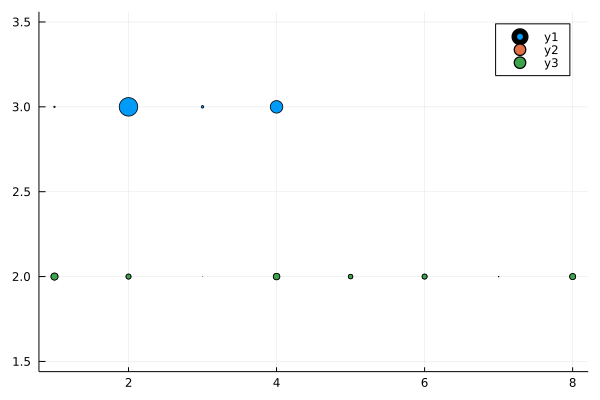

In [34]:
scatter!(yy, ms = 20*pb, ylims=[1.5,3.5])